<center><img src="https://synapsedatascience.com.br/wp-content/uploads/2020/12/logo-jupyter.png" width="300"/></center>

Manipulando dados Geoespaciais com GeoPandas | Parte 2/4

https://www.youtube.com/watch?v=6ovnvl6pxQM

# Estrutura do GeoPandas

![Divisão do GeoPandas](imagens/geopandas_separacao_expandido.png)

A biblioteca `geopandas` é uma extensão da biblioteca `pandas` criada para facilitar a manipulação de dados georreferenciados.

# 1. Modelo espacial de dados

![Modelo espacial de dados](imagens/ponto_linha_poligono.png)

Os objetos geométricos fundamentais para trabalhar com dados espaciais são: `Points`, `Lines` e `Polygons`. Em python podemos usar a biblioteca [Shapely](https://shapely.readthedocs.io/en/latest/project.html) para definir e realizar operações com os objetos geométricos. Entre algumas funcionalidades, podemos citar:

-  Criar objetos básicos, como: `Point`, `Line`, `Polygon` e outros;
-  Calcular área, tamanho, limite dos objetos geométricos;
-  Realizar operações geométricas, como: `Union`, `Intersection`, `Difference`, `Distance` e etc;
-  Realizar consultas espaciais entre geometrias, como: `Intersects`, `Touches`, `Crosses`, `Within` e etc.

**Os objetos geométricos consistem em tuplas de coordenadas, em que:**

-  `Point`: representa um ponto no espaço. Podendo ser bidimensional (x, y) ou tridimensional (x, y, z);
-  `LineString`: representa uma sequência de pontos para formar uma linha. Uma linha consiste de pelo menos dois pontos.
-  `Polygon`: representa um polígono preenchido, formado por uma lista de pelo menos três pontos, que indicam uma estrutura de anel externo. Os polígonos também podem apresentar aberturas internas (buracos).

É possível instalar o módulo `shapely` em nosso ambiente através do comando:

In [1]:
# instalando a biblioteca shapely com conda
# !conda install shapely -y

# instalando a biblioteca shapely com pip
# pip install shapely

SyntaxError: invalid syntax (621892783.py, line 5)

In [ ]:
# mostrar a versão da biblioteca
# !conda list shapely

Vamos importar os objetos geométricos.

In [1]:
# importar os objetos geométricos da biblioteca shapely
from shapely.geometry import Point, LineString, Polygon

## 1.1. Ponto (Point)

![Exemplo de aplicações com Ponto](imagens/ponto-exemplo-app.png)

Para criar um objeto `Point` passaremos as coordenadas x e y para a classe `Point()`. 

**`Dica:`** para pontos tridimensionais podemos incluir a coordenada z.

In [2]:
# criar uma geometria do tipo ponto
ponto = Point(5, 10)

Vamos ver como a variável do tipo `Point` é mostrada no jupyter:

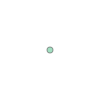

In [3]:
ponto

Vamos imprimir e ver o tipo do objeto para ver a sua definição:

In [4]:
print(ponto)

POINT (5 10)


In [5]:
type(ponto)

shapely.geometry.point.Point

### Ponto - Atributos e funções

Os objetos do tipo `Point` já possuem atributos e funções internas para realizar operações básicas. Uma das funções mais simples é a capacidade de extrair as coordenadas e a possibilidade de calcular a distância entre dois pontos.

Podemos obter as coordenadas x e y de diferentes maneiras: 

In [7]:
# utilizando a função coords
ponto.coords  # <-objeto coordinate sequence <shapely.coords.CoordinateSequence at 0x23910b97df0>
list(ponto.coords)

[(5.0, 10.0)]

In [8]:
# lendo x e y separadamente
x = ponto.x
y = ponto.y
print(x , y)


5.0 10.0


Também podemos calcular a distância entre dois pontos:

In [20]:
# definir os pontos
ponto_1 = Point(2, 3)
ponto_2 = Point(5, 7)

# calcular a distância
distancia =  ponto_1.distance(ponto_2)


# mostrar a distância
print( f"Distância entre pontos: {distancia}")

Distância entre pontos: 5.0


## 1.2. Linha (LineString)

![Exemplo de aplicações com Ponto](imagens/linha-exemplo-app.png)

Criar um objeto `LineString` é parecido com a criação objeto `Point`. 

Agora, em vez de usar uma única tupla de coordenadas, nós podemos contruir uma linha usando uma lista de `Point` ou um vetor de tuplas com as respectivas coordenadas:

In [14]:
# definir três pontos
ponto_1 = Point(2, 3)
ponto_2 = Point(5, 7)
ponto_3 = Point(2, 10)

# criar uma linha a partir de objetos pontos 
linha = LineString([ponto_1, ponto_2, ponto_3])

Vamos ver como a variável do tipo `LineString` é mostrada no jupyter:

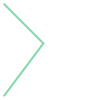

In [15]:
linha

Vamos imprimir e ver o tipo do objeto linha para ver a sua definição:

In [16]:
print(linha)

LINESTRING (2 3, 5 7, 2 10)


In [17]:
type(linha)

shapely.geometry.linestring.LineString

### Linha - Atributos e funções

O objeto `LineString` possui diversos atributos e funções internas. Algumas operações possíveis com o objeto do tipo linha:

- extrair as coordenadas;
- calcular o tamanho da linha;
- calcular o ponto médio (centróide).

A lista completa de funcionalidades pode ser acessada na [documentação da biblioteca](https://shapely.readthedocs.io/en/latest/manual.html#linestrings). 

Vamos ver algumas dessas funções.

Nós podemos extrair as coordenadas da `LineString` similar ao objeto `Point`.

In [18]:
# utilizando a função coords
list(linha.coords)

[(2.0, 3.0), (5.0, 7.0), (2.0, 10.0)]

In [23]:
# lendo x e y separadamente
coordenadas_x = list(linha.xy[0])
coordenadas_y = list(linha.xy[1])

print(f"coord x {coordenadas_x}")
print(f"coord y {coordenadas_y}")

coord x [2.0, 5.0, 2.0]
coord y [3.0, 7.0, 10.0]


Também é possível obter o comprimento da linha e o ponto central (centróide) diretamente do objeto:

In [25]:
# pegar o comprimento da linha
linha.length

# mostrar o comprimento da linha
print(linha.length)

9.242640687119284


In [27]:
# obter o ponto central (centróide)
print(linha.centroid)   # coordenadas do centro do objeto linha


POINT (3.5000000000000004 6.606601717798214)


## 1.3. Polígono (Polygon)

![Exemplo de aplicações com Poligono](imagens/poligono-exemplo-app.png)

Podemos criar um objeto `Polygon` usando a mesma lógica do `Point` e `LineString`, porém a criação do objeto `Polygon` só aceita uma sequência de coordenadas.

Para criar um polígono são necessários __pelo menos três coordenadas__.

Um poligono é preenchido, e pode ter um buraco.

In [29]:
# criar um Polygon passando as coordenadas
poly = Polygon([(2,3),(5,7),(2,10)])

Vamos ver como a variável do tipo `Polygon` é mostrada no jupyter:

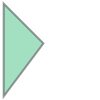

In [31]:
# visualização do poligono no Jupyter
poly

Vamos imprimir e ver o tipo do objeto linha para ver a sua definição:

In [32]:
print(poly)

POLYGON ((2 3, 5 7, 2 10, 2 3))


In [34]:
type(poly)

shapely.geometry.polygon.Polygon

### Polígonos - Atributos e funções

Podemos acessar diferentes funções diretamente do objeto `Polygon`, que são úteis para muitas tarefas e análises, como: obter área, centróide, _bounding box_, o exterior e o perímetro (tamanho exterior).

Aqui, podemos ver alguns atributos disponíveis e como acessá-los:

In [41]:
# obter as coordenadas do poligono
poly.exterior.coords # <- tipo coordinate sequence<shapely.coords.CoordinateSequence at 0x2391062c9d0>
print(poly.exterior.coords)
print(type(poly.exterior.coords))
print(list(poly.exterior.coords), " Observe que ele fechou, o 1º = último" )

<class 'shapely.coords.CoordinateSequence'>
[(2.0, 3.0), (5.0, 7.0), (2.0, 10.0), (2.0, 3.0)]  Observe que ele fechou, o 1º = último


In [40]:
# calcular a área
print(poly.area)



10.5


POINT (3 6.666666666666667)


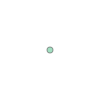

In [43]:
# pegar o centroide do polígono
print(poly.centroid)
poly.centroid


LINEARRING (2 3, 5 7, 2 10, 2 3)


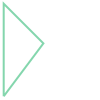

In [45]:
# obter as coordenadas do bounding box

poly.exterior


In [46]:
print(poly.exterior)  # anel exterior do poly



LINEARRING (2 3, 5 7, 2 10, 2 3)


In [47]:
# obter o tamanho da linha exterior
print(poly.exterior.length)



16.242640687119284


# 2. Operações básicas entre geometrias

POLYGON ((3 1, 2.995184726672197 0.9019828596704393, 2.9807852804032304 0.8049096779838718, 2.9569403357322086 0.7097153227455377, 2.923879532511287 0.6173165676349102, 2.881921264348355 0.5286032631740023, 2.8314696123025453 0.4444297669803978, 2.773010453362737 0.3656067158363545, 2.7071067811865475 0.2928932188134524, 2.6343932841636457 0.2269895466372631, 2.555570233019602 0.1685303876974548, 2.471396736825998 0.1180787356516451, 2.3826834323650896 0.0761204674887133, 2.2902846772544625 0.0430596642677911, 2.1950903220161284 0.0192147195967696, 2.098017140329561 0.0048152733278032, 2 0, 1.9019828596704393 0.0048152733278031, 1.8049096779838718 0.0192147195967696, 1.709715322745538 0.0430596642677911, 1.6173165676349104 0.0761204674887133, 1.5286032631740023 0.118078735651645, 1.444429766980398 0.1685303876974546, 1.3656067158363547 0.2269895466372629, 1.2928932188134525 0.2928932188134524, 1.2269895466372631 0.3656067158363545, 1.1685303876974547 0.4444297669803978, 1.1180787356516

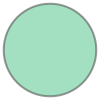

In [50]:
# vamos criar dois círculos
circulo_1 = Point(1,1).buffer(1)  # buffer cresce o circulo em todas as extremidades
circulo_2 = Point(2,1).buffer(1)
print(circulo_2)
print(type(circulo_2))

circulo_2

Vamos mostrar os dois círculos com a biblioteca matplotlib.

In [52]:
# instalar matplotlib no venv 
# pip install matplotlib
# importar a biblioteca matplotlib
import matplotlib.pyplot as plt

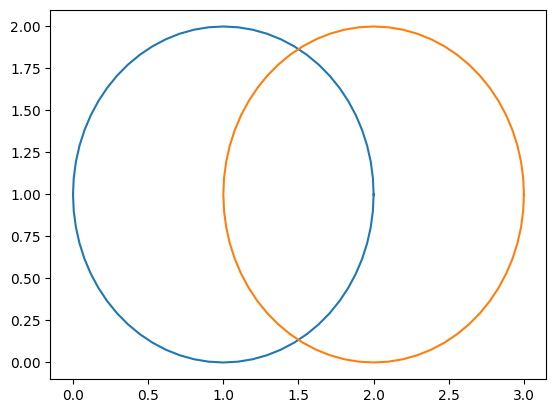

In [55]:
# plotar o círculo 1 
x,y = circulo_1.exterior.xy
plt.plot(x,y)


# plotar o círculo 2
x,y = circulo_2.exterior.xy
plt.plot(x,y)

plt.show()


## 2.1. Interseção

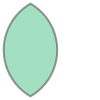

In [57]:
# operação de interseção
circulo_inter = circulo_1.intersection(circulo_2)
circulo_inter


## 2.2. União

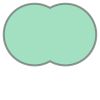

In [58]:
# operação de união
circulo_union = circulo_1.union(circulo_2)
circulo_union



## 2.3. Diferença

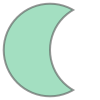

In [59]:
# operação de diferença
circulo_difference = circulo_1.difference(circulo_2)
circulo_difference



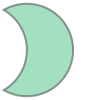

In [60]:
# operação de diferença
circulo_dif2 = circulo_2.difference(circulo_1)
circulo_dif2



## 2.4. Diferença Simétrica

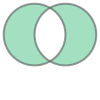

In [61]:
# operação de diferença simétrica
circulo_diffsim = circulo_1.symmetric_difference(circulo_2)
circulo_diffsim



## Resumo

Nesta aula nós vimos como criar objetos geométricos com a biblioteca shapely. Mais especificamente 
voce deve ter aprendido:

**1)** Criar objetos de pontos, linhas e polígonos;

**2)** Usar funções básicas dos objetos geométricos;

**3)** Realizar operações entre geometrias.